This file is used to test betabinomial works or not.

In [2]:
import vireoSNP
from vireoSNP.utils.vcf_utils import read_sparse_GeneINFO, load_VCF, write_VCF, parse_donor_GPb
from scipy.io import mmread
import pickle

In [5]:
sample = "gct86"
vcf_file = "/home/linxy29/data/maester/oagct/" + sample + "/maester_cellSNP/cellSNP.cells.vcf.gz"
cell_vcf = load_VCF(vcf_file, biallelic_only=True)
cell_dat = read_sparse_GeneINFO(cell_vcf['GenoINFO'], keys=['AD', 'DP'])
cell_dat['variants'] = cell_vcf['variants']

In [7]:
cell_dat['AD'].shape
cell_dat['DP'].shape
cell_dat['variants'][:5]

['chrM_39_C_A', 'chrM_40_T_A', 'chrM_41_C_A', 'chrM_42_T_A', 'chrM_43_C_A']

In [8]:
## subsample AD and DP and convert to coo matrix for testing
test_AD = cell_dat['AD'][:3000, :].tocoo()
test_DP = cell_dat['DP'][:3000, :].tocoo()
test_variants = cell_dat['variants'][:3000]
test_AD.shape

(3000, 1283)

In [9]:
## setting for mquad
out_dir = "/home/linxy29/data/maester/oagct/" + sample + "/maester_betamquad/"
nproc = 32
minDP = 2
beta_mode = True
minCell = 10
cutoff = None

In [10]:
from mquad.mquad import Mquad
mdphd = Mquad(AD = test_AD, DP = test_DP, variant_names = test_variants)
df = mdphd.fit_deltaBIC(out_dir = out_dir, nproc = nproc, minDP = minDP, beta_mode = True)
#best_ad, best_dp = mdphd.selectInformativeVariants(min_cells = minCell, out_dir = out_dir, tenx_cutoff=cutoff)

3000 variants detected
variant names detected
CPUs used: 32
[MQuad] Initializing fit(mode: deltaBIC) on 3000 variants...


/home/linxy29/.conda/envs/maester/lib/python3.10/site-packages/bbmix/models/binomial_mix.py:143: RuntimeWarning: divide by zero encountered in log
  + y * np.log(p) + (n - y) * np.log(1 - p) + np.log(pi)
/home/linxy29/.conda/envs/maester/lib/python3.10/site-packages/bbmix/models/binomial_mix.py:143: RuntimeWarning: invalid value encountered in multiply
  + y * np.log(p) + (n - y) * np.log(1 - p) + np.log(pi)
/home/linxy29/.conda/envs/maester/lib/python3.10/site-packages/bbmix/models/binomial_mix.py:105: RuntimeWarning: divide by zero encountered in log
  np.log(1 - p_k) + np.log(pi_k)
/home/linxy29/.conda/envs/maester/lib/python3.10/site-packages/bbmix/models/binomial_mix.py:104: RuntimeWarning: invalid value encountered in multiply
  E_gammas[k] = y * np.log(p_k) + (n - y) * \


Cells qualified: 1	model1 BIC:nan	model2 BIC:nan	 deltaBIC:nan
Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00
Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00
Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00
Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00

Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00
Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00


Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1	model1 BIC:0.51	model2 BIC:0.51	 deltaBIC:0.00Cells qualified: 1

[MQuad] Finding knee point for deltaBIC cutoff...
deltaBIC cutoff =  252.3020075275581
Number of variants passing threshold: 9


/home/linxy29/code/MQuad2/mquad/mquad.py:279: RuntimeWarning: invalid value encountered in divide
  af = best_ad/best_dp


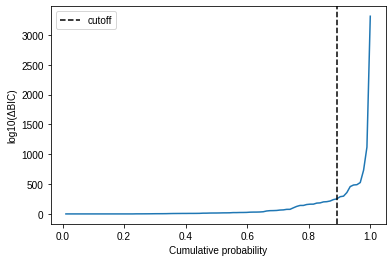

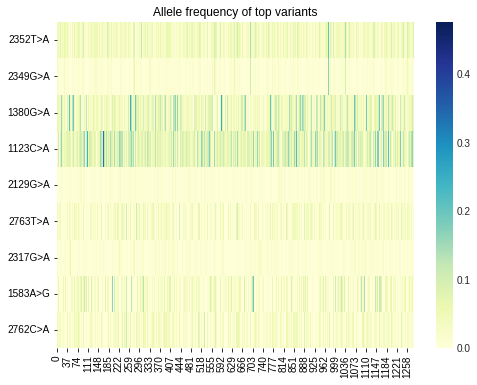

In [11]:
best_ad, best_dp = mdphd.selectInformativeVariants(min_cells = minCell, out_dir = out_dir, tenx_cutoff=cutoff)

Check the distribution of informative snp

In [ ]:
sample = "gct86"
AD = mmread("/home/linxy29/data/maester/oagct/" + sample + "/maester_mquad/cellSNP.tag.AD.mtx")
DP = mmread("/home/linxy29/data/maester/oagct/" + sample + "/maester_mquad/cellSNP.tag.DP.mtx")